#### Objective:
    The purpose of this study is to predict the sale price of the house using advanced linear regression, Decision Tree, Random Forest, SVM, XGBoosting and simple neural network techniques.
    
#### Table of contents:
- Data description
- Load libraries and data
- Visualize data 
- Data pre-processing
- Data modeling and evaluation
- Final prediction

#### Data Description:
    Dataset used to predict sale price of the house is obtained from Kaggle website. It consists of 2920 observation and 81 variables. Below is the quick description of the variables available in the dataset. Note the SalePrice is target variable
1.	SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
2.	MSSubClass: The building class
3.	MSZoning: The general zoning classification
4.	LotFrontage: Linear feet of street connected to property
5.	LotArea: Lot size in square feet
6.	Street: Type of road access
7.	Alley: Type of alley access
8.	LotShape: General shape of property
9.	LandContour: Flatness of the property
10.	Utilities: Type of utilities available
11.	LotConfig: Lot configuration
12.	LandSlope: Slope of property
13.	Neighborhood: Physical locations within Ames city limits
14.	Condition1: Proximity to main road or railroad
15.	Condition2: Proximity to main road or railroad (if a second is present)
16.	BldgType: Type of dwelling
17.	HouseStyle: Style of dwelling
18.	OverallQual: Overall material and finish quality
19.	OverallCond: Overall condition rating
20.	YearBuilt: Original construction date
21.	YearRemodAdd: Remodel date
22.	RoofStyle: Type of roof
23.	RoofMatl: Roof material
24.	Exterior1st: Exterior covering on house
25.	Exterior2nd: Exterior covering on house (if more than one material)
26.	MasVnrType: Masonry veneer type
27.	MasVnrArea: Masonry veneer area in square feet
28.	ExterQual: Exterior material quality
29.	ExterCond: Present condition of the material on the exterior
30.	Foundation: Type of foundation
31.	BsmtQual: Height of the basement
32.	BsmtCond: General condition of the basement
33.	BsmtExposure: Walkout or garden level basement walls
34.	BsmtFinType1: Quality of basement finished area
35.	BsmtFinSF1: Type 1 finished square feet
36.	BsmtFinType2: Quality of second finished area (if present)
37.	BsmtFinSF2: Type 2 finished square feet
38.	BsmtUnfSF: Unfinished square feet of basement area
39.	TotalBsmtSF: Total square feet of basement area
40.	Heating: Type of heating
41.	HeatingQC: Heating quality and condition
42.	CentralAir: Central air conditioning
43.	Electrical: Electrical system
44.	1stFlrSF: First Floor square feet
45.	2ndFlrSF: Second floor square feet
46.	LowQualFinSF: Low quality finished square feet (all floors)
47.	GrLivArea: Above grade (ground) living area square feet
48.	BsmtFullBath: Basement full bathrooms
49.	BsmtHalfBath: Basement half bathrooms
50.	FullBath: Full bathrooms above grade
51.	HalfBath: Half baths above grade
52.	Bedroom: Number of bedrooms above basement level
53.	Kitchen: Number of kitchens
54.	KitchenQual: Kitchen quality
55.	TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
56.	Functional: Home functionality rating
57.	Fireplaces: Number of fireplaces
58.	FireplaceQu: Fireplace quality
59.	GarageType: Garage location
60.	GarageYrBlt: Year garage was built
61.	GarageFinish: Interior finish of the garage
62.	GarageCars: Size of garage in car capacity
63.	GarageArea: Size of garage in square feet
64.	GarageQual: Garage quality
65.	GarageCond: Garage condition
66.	PavedDrive: Paved driveway
67.	WoodDeckSF: Wood deck area in square feet
68.	OpenPorchSF: Open porch area in square feet
69.	EnclosedPorch: Enclosed porch area in square feet
70.	3SsnPorch: Three season porch area in square feet
71.	ScreenPorch: Screen porch area in square feet
72.	PoolArea: Pool area in square feet
73.	PoolQC: Pool quality
74.	Fence: Fence quality
75.	MiscFeature: Miscellaneous feature not covered in other categories
76.	MiscVal: $Value of miscellaneous feature
77.	MoSold: Month Sold
78.	YrSold: Year Sold
79.	SaleType: Type of sale
80.	SaleCondition: Condition of sale




#### Load library and data

In [120]:
# dataframe
import pandas as pd 

#computation
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec


#Statistics
from scipy import stats
from scipy.stats import norm,skew
from statistics import mode
from scipy.special import boxcox1p
import matplotlib.gridspec as gridspec

# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.model_selection import KFold,train_test_split,cross_val_score,GridSearchCV
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import make_scorer,r2_score
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn import svm

In [2]:
# Read data
train=pd.read_csv("C:/Rekha/Personal/kag/Ames_Housing/train.csv")
test=pd.read_csv("C:/Rekha/Personal/kag/Ames_Housing/train.csv")

In [9]:
# Quick look at the data
print("Train size: "+ str(train.shape))
print("Test size: "+ str(test.shape))

Train size: (1460, 81)
Test size: (1460, 81)


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

As you can see in the above information, not all the variables in the train and test data set contains 1460 observations which means some of the variables eg. Fence,MiscFeature are missing values. We can address this as part of data preprocessing steps in the later section. Now lets take a look at the qualitative and quantitive variables seperately. 

In [103]:
# missing values
all_data=pd.concat([train,test],ignore_index=True)
missing_values=all_data.isnull().sum()
all_data.shape

(2920, 81)

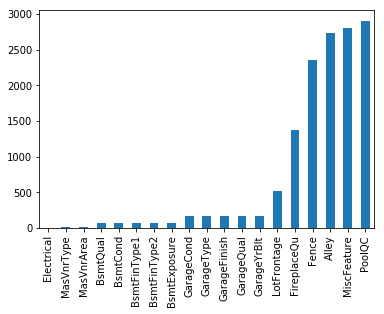

In [44]:
# visualize missing values
missing_values_high=missing_values[missing_values>0]
missing_values_high.sort_values(inplace=True)
missing_values_high.plot.bar()

In [ ]:
# Target variable analysis


In [28]:
numeric_features=train.select_dtypes(include=[np.number])
categorical_features=train.select_dtypes(include=[np.object])

In [29]:
# numeric features
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [26]:
# categorical features
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Overall, there are 36 quantitative variables and 43 qualitative variables plus ID and Sale price variables in the dataset.

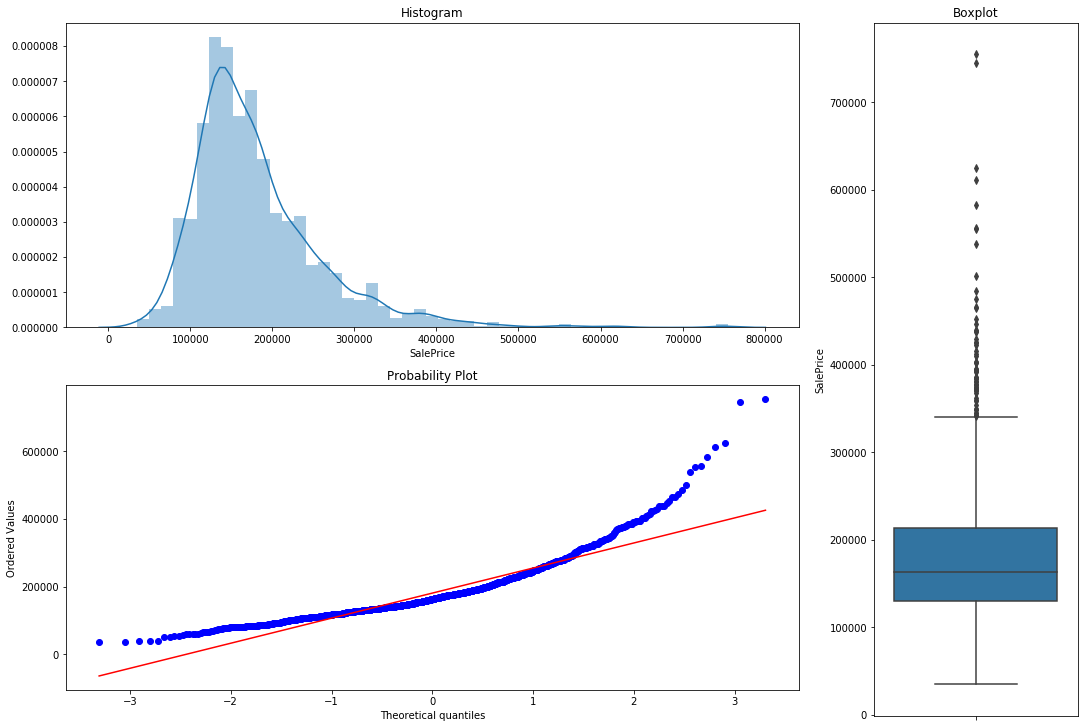

In [45]:
# Target variable analysis:
fig=plt.figure(constrained_layout=True,figsize=(15,10))
grid=gridspec.GridSpec(ncols=3,nrows=3,figure=fig)

ax1=fig.add_subplot(grid[0, :2])
ax1.set_title('Histogram')
sns.distplot(train.SalePrice,norm_hist=True,ax=ax1)

ax2=fig.add_subplot(grid[1, :2])
ax2.set_title('QQ Plot')
stats.probplot(train['SalePrice'],plot=ax2)

ax3=fig.add_subplot(grid[:,2])
ax3.set_title('Boxplot')
sns.boxplot(train.SalePrice, orient='v', ax=ax3)

In [46]:
print("Skewness: "+str(train["SalePrice"].skew().round(2)))
print("Kurtosis: "+str(train["SalePrice"].kurt().round(2)))

Skewness: 1.88
Kurtosis: 6.54


In [47]:
# visualize correlation between features and sale price
(all_data.corr()**2)["SalePrice"].sort_values(ascending=False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

C:\Users\rekmani\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


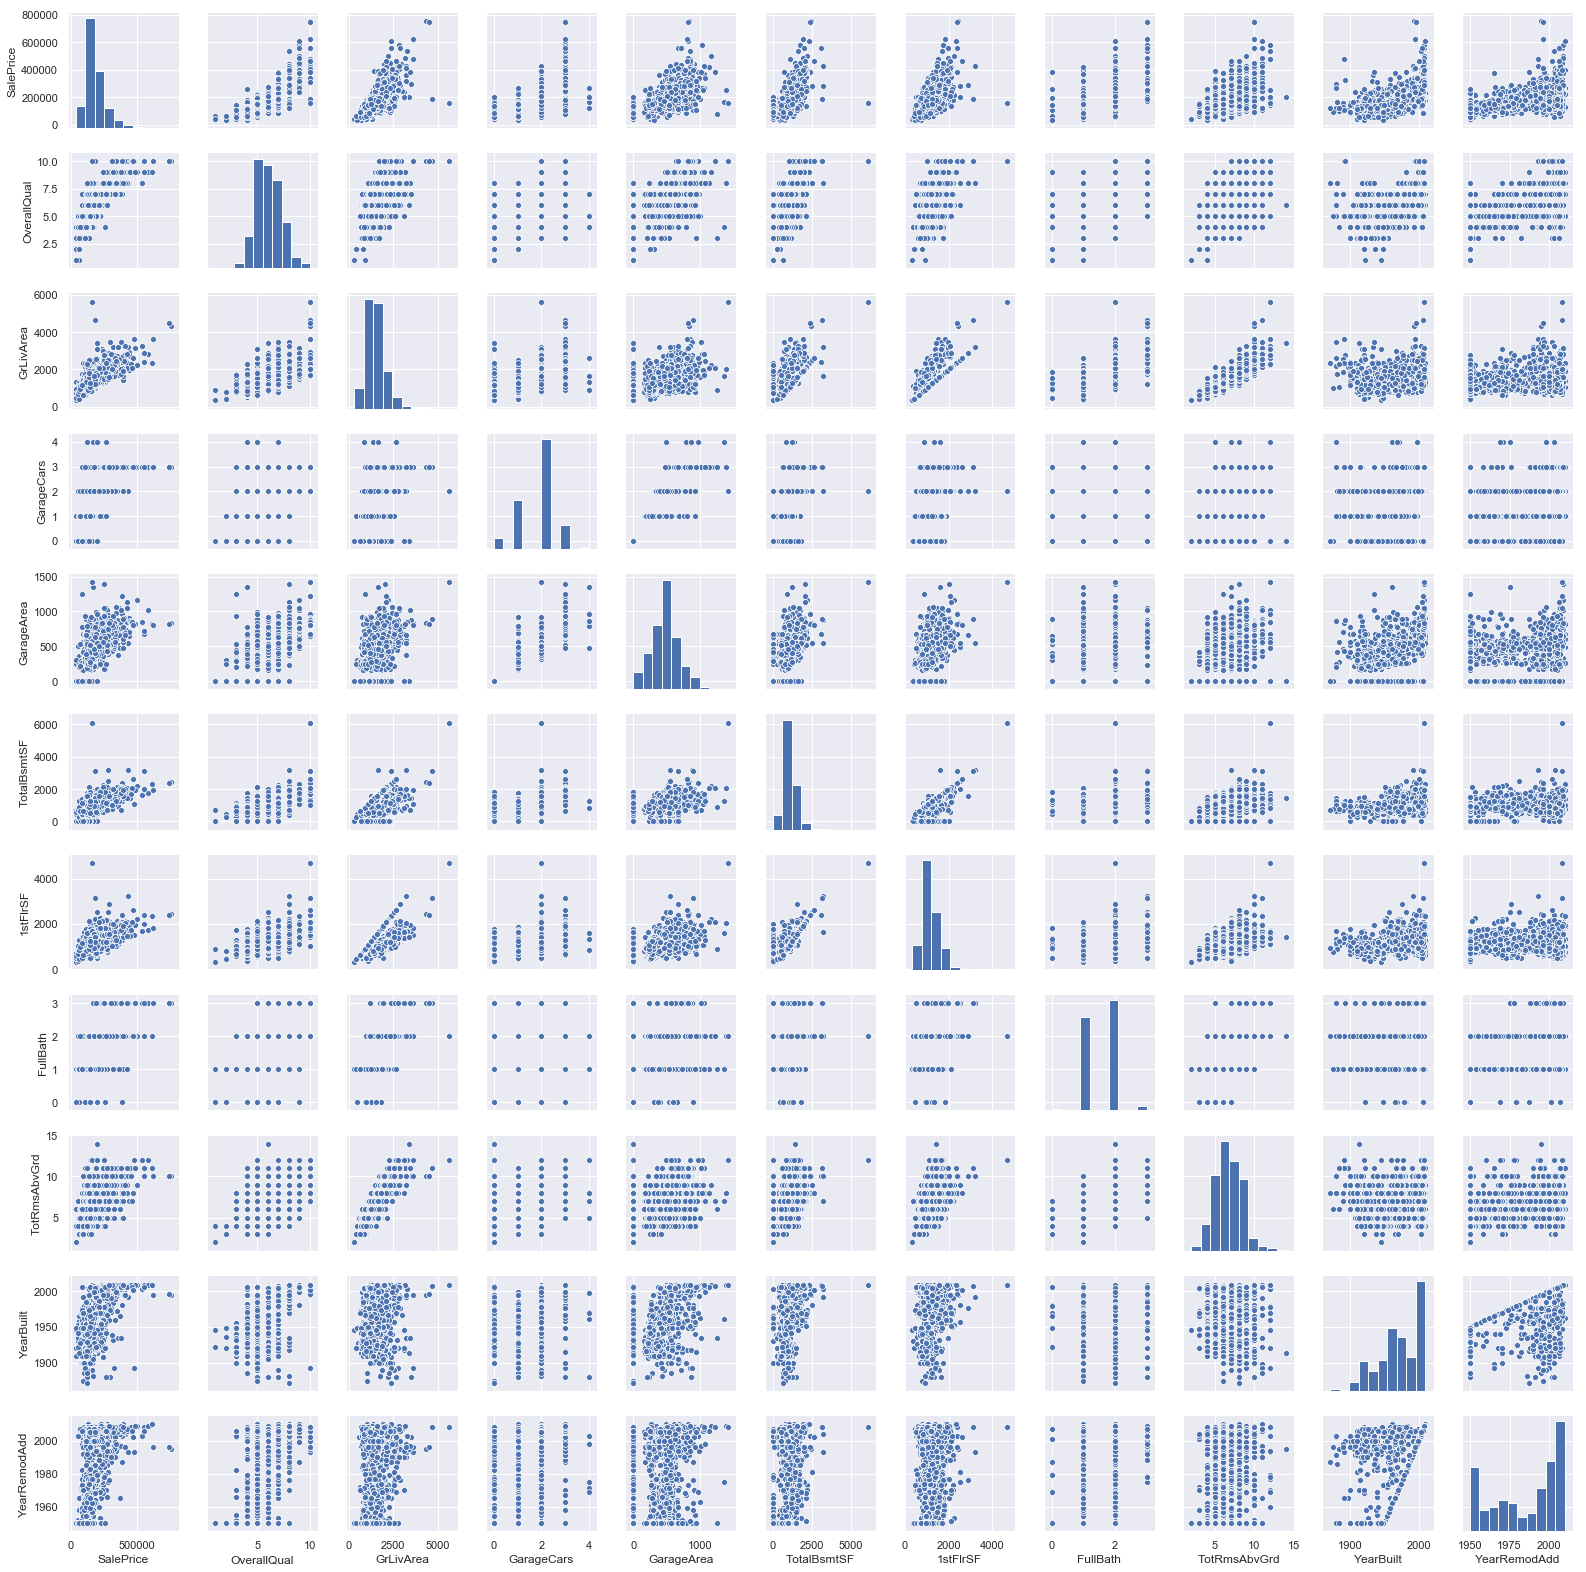

In [52]:
# pairplot
sns.set()
columns=['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']
sns.pairplot(all_data[columns],size=2,kind='scatter')
plt.show()

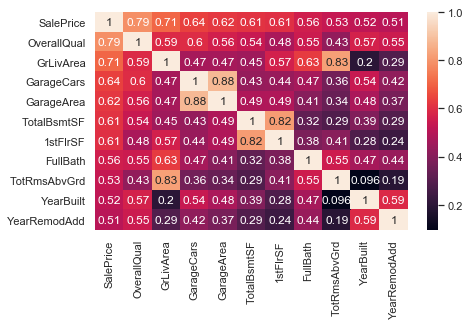

In [53]:
#Heatmap
plt.figure(figsize=(7,4))
columns=['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']
sns.heatmap(all_data[columns].corr(),annot=True)
plt.show()

<Figure size 432x288 with 0 Axes>

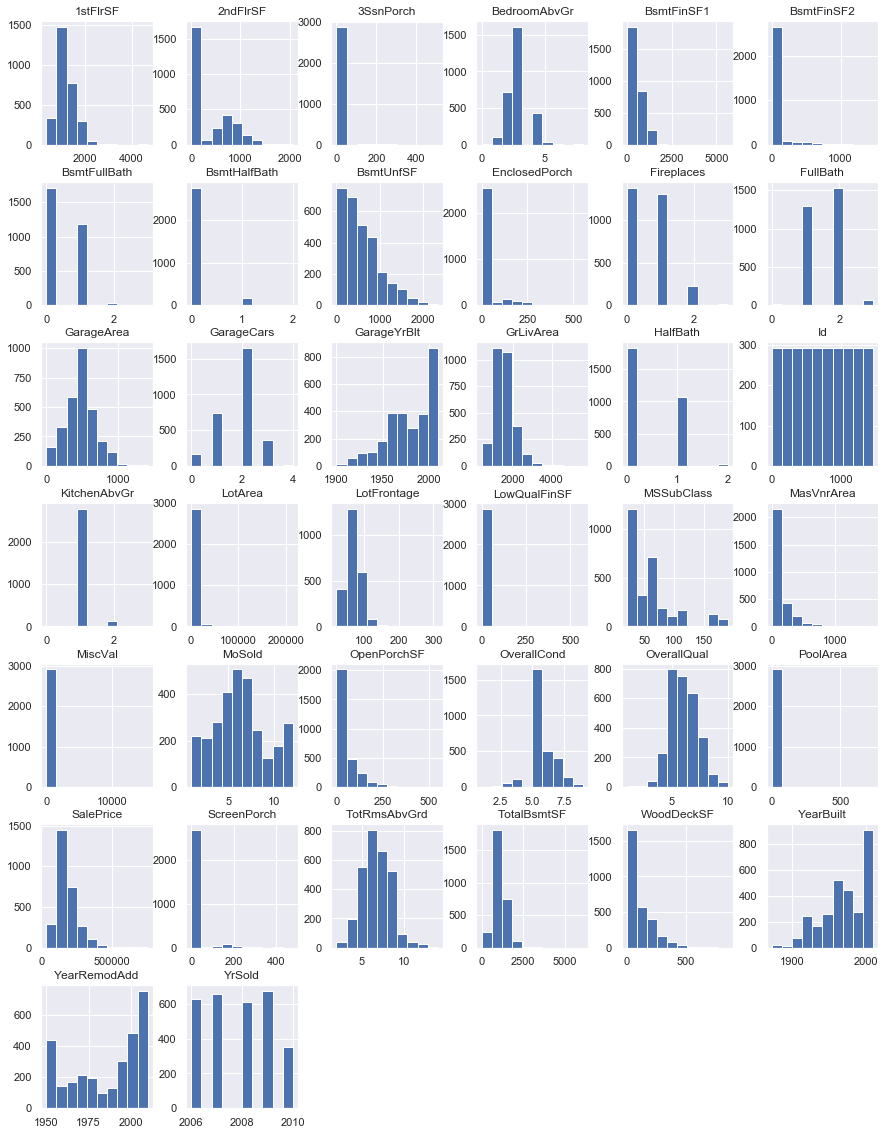

<Figure size 432x288 with 0 Axes>

In [54]:
# create histogram to get an idea of distribution of data
all_data.hist(figsize=[15,20])
plt.figure()

From the above plots, we observe that
1. Some features are missing values. 
2. Target variable (ie. sale price) is not normally distributed. Also, target variables seems to have quite bit of kurtosis and skewness
3. Correlation plot indicates that Sale price is highly correlated to OverallQual variables. This was further confirmed by comparing the correlated variables to Sale price using pairplot and heatmap
4. There are 43 categorical variables that needs to be converted into indicator variable so it can be used for ML models.

Lets go ahead and fix all the above issues.

### Data pre-processing

Let us perform the below steps to fix all the above observations.
1. Apply hot encoding to convert categorical variable into dummy/indicator variables
2. Fill Nan with median for missing values
3. Log transformation to handle skewed distribution for target variable and feature. Transformation techniques like Log transformation and boxcox transformation can help to stabilize variance, make data more normal distribution-like and improve the validity of measures of association. Here we will use log transformation technique. 
4. Apply PCA technique for feature selection

In [ ]:
all_data=all_data.drop('SalePrice', 1)

In [108]:
# Apply hot encoding
all_data=pd.get_dummies(all_data)
all_data.head()
#notice there are 290 columns now after applying hot encoding so it can be used for ML models

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [109]:
#Fill Nan with median
imp=Imputer(missing_values='NaN',strategy='most_frequent',axis=0)
all_data=imp.fit_transform(all_data)
#np.isnan(all_data).sum() # notice all the missing values(NaN) are removed

C:\Users\rekmani\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [110]:
# Log Transformation
all_data=np.log(all_data)

C:\Users\rekmani\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [111]:
# change -inf to 0
all_data[all_data==-np.inf]=0

In [112]:
# Feature reduction using PCA
pca=PCA(whiten=True)
pca.fit(all_data)
variance=pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.22049491, 0.39561468, 0.51726028, 0.61822633, 0.68987834,
       0.74816703, 0.79922279, 0.84263209, 0.8747121 , 0.90464268,
       0.93006061, 0.94653319, 0.95589352, 0.96478226, 0.97268455,
       0.97996163, 0.98494998, 0.98899036, 0.9920608 , 0.99403362,
       0.99534734, 0.99628384, 0.99710171, 0.99782265, 0.99849023,
       0.9989913 , 0.99938586, 0.99962478, 0.99980485, 0.99988686,
       0.9999429 , 0.99998655, 0.99999678, 0.99999878, 0.99999947,
       0.99999999, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [123]:
pca=PCA(n_components=36,whiten=True)
pca=pca.fit(all_data)
dataPCA=pca.transform(all_data)

Take a look at the absolute values of the components which are sorted by explained_variance_. The larger these absolute values are, the more a specific feature contributes to that principal component. 

In [113]:
# create train and test data
X_train=all_data[:1460]
X_test=all_data[1460:]

In [116]:
labels=train["SalePrice"]

In [134]:
Y_test=test["SalePrice"]

We have done some basic  data pre-processing and prepared the training and test data for building and validating the machine learning models. 

### Data modeling and evaluation

C:\Users\rekmani\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rekmani\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rekmani\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rekmani\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rekmani\anaconda3\lib\site-packages\sklearn\ensemble\forest

,R Square Score
RandomForest,0.841853
Bagging,0.836947
AdaBoost,0.803594
Lasso,0.734912
Linear,0.734912
Ridge,0.730345
Bayesian Ridge,0.729717
Hubber,0.729568
SVM Linear,0.039704
SVM RBF,-0.053366


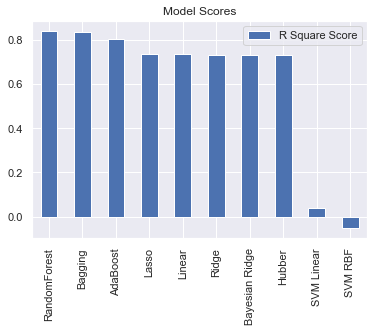

In [121]:
def validate_r2(train,labels):
    results={}
    def test_model(clf):
        cv=KFold(n_splits=5, shuffle=True, random_state=45)
        r2=make_scorer(r2_score)
        r2_val_score=cross_val_score(clf,X_train,labels,cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores
    clf=linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf=linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf=linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AdaBoostRegressor()
    results["AdaBoost"]=test_model(clf)
    
    clf = svm.SVR()
    results["SVM RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVM Linear"]=test_model(clf)
    
    results=pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"]
    results=results.sort_values(by=["R Square Score"],ascending=False)
    results.plot(kind="bar",title="Model Scores")
    axes=plt.gca()
    return results

validate_r2(X_train,labels)

As you can see, I have executed different machine learning models starting with most simple linear regression model followed by Random Forest, advanced regression models(Lasso, Ridge), SVM, Bagging and Adaboost models. Out of all models, we see that Random forest model produced high accuracy and seems to be better model for predicting sale price with this data set. 

Lets see if we can produce better results with PCA data ie. Data with reduced features

C:\Users\rekmani\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rekmani\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rekmani\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rekmani\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rekmani\anaconda3\lib\site-packages\sklearn\ensemble\forest

,R Square Score
RandomForest,0.833897
Bagging,0.814795
AdaBoost,0.794614
Lasso,0.734912
Linear,0.734912
Ridge,0.730345
Bayesian Ridge,0.729717
Hubber,0.729568
SVM Linear,0.039704
SVM RBF,-0.053366


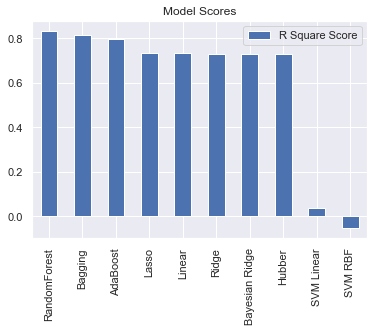

In [124]:
# now lets try with PCA data
Y_train=dataPCA[:1460]
Y_test=dataPCA[1460:]
validate_r2(Y_train,labels)

As you can notice that Random Forest model produced better accuracy results when compared to other models however accuracy went down slightly with PCA data. 

Note data with reduced dimensionality might not be recommended in this case. We can however try other dimension reduction techniques like Forward feature selection, backward feature elimination, missing value ration which we will not be covering it here. 

We will consider Random Forest to be better model and use it for predicting sale price using test data


### Final prediction

In [129]:
rfr=RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train,labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [138]:
rfr_pred=rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

In [140]:
test_pred_rfr = pd.DataFrame(rfr_pred, columns=['SalePrice'])
test_pred_rfr.head()

,SalePrice
0,206280.50
1,173892.90
2,221711.03
3,153730.00
4,262390.50


### Conclusion:
  Although Random forest seems to be better model for estimating the sale price for homes at Iowa, it cannot be generalizable considering the Ames data alone. We may want to try with more data from Iowa location. We can fine tune the model by building alternative models like neural networks.  